In [1]:
# !pip install python-Levenshtein
# conda install -c conda-forge python-levenshtein
# https://en.wikipedia.org/wiki/Levenshtein_distance

In [2]:
import pandas as pd
import re
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader
import numpy as np
import matplotlib.pyplot as plt

# https://radimrehurek.com/gensim/models/word2vec.html
# https://www.kaggle.com/jeongbinpark/word2vec-basic-of-nlp

In [3]:
normalized_text=[['AZ', 'ALMA', 'NEM', 'ESIK','MESSZE', 'A', 'FAJATOL'],['AZ', 'ALMA', 'VAGY', 'ALMAFA', 'A', 'ROZSAFELEK', 'CSALADJABA', 'TARTOZO', 'NOVENYNEMZETSEG']]

In [4]:
model = Word2Vec(sentences=normalized_text, vector_size=2, min_count=1)

In [5]:
model.wv['ALMA']

array([0.25519115, 0.45050585], dtype=float32)

In [6]:
model.wv.most_similar('ALMA')

[('NOVENYNEMZETSEG', 0.9941185116767883),
 ('MESSZE', 0.9008386731147766),
 ('VAGY', 0.7495834231376648),
 ('ESIK', 0.5873665809631348),
 ('ROZSAFELEK', 0.43491703271865845),
 ('CSALADJABA', 0.30556321144104004),
 ('NEM', 0.023197591304779053),
 ('A', -0.10088382661342621),
 ('ALMAFA', -0.7660549283027649),
 ('TARTOZO', -0.9164511561393738)]

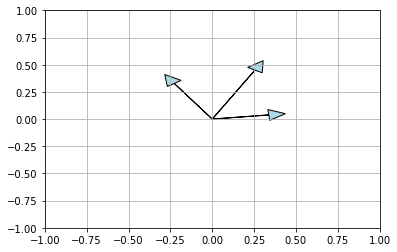

In [7]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.axes()

ax.arrow(0.0, 0.0, model.wv['ALMA'][0], model.wv['ALMA'][1], head_width=0.1, head_length=0.1, fc='lightblue', ec='black')
ax.arrow(0.0, 0.0, model.wv['ESIK'][0], model.wv['ESIK'][1], head_width=0.1, head_length=0.1, fc='lightblue', ec='black')
ax.arrow(0.0, 0.0, model.wv['ROZSAFELEK'][0], model.wv['ROZSAFELEK'][1], head_width=0.1, head_length=0.1, fc='lightblue', ec='black')
plt.grid()

plt.xlim(-1,1)
plt.ylim(-1,1)


plt.show()
plt.close()

## Prepare data

In [8]:
data=pd.read_csv("True.csv")
data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
data = data['text']
data.head()

0    WASHINGTON (Reuters) - The head of a conservat...
1    WASHINGTON (Reuters) - Transgender people will...
2    WASHINGTON (Reuters) - The special counsel inv...
3    WASHINGTON (Reuters) - Trump campaign adviser ...
4    SEATTLE/WASHINGTON (Reuters) - President Donal...
Name: text, dtype: object

In [10]:
%%time
normalized_text = []
for i in data:
    i = i.upper()
    i = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', i)
    normalized_text.append(i.split(' '))
    
# https://docs.python.org/3/library/re.html

Wall time: 4.14 s


In [11]:
print(len(normalized_text))
print(len(normalized_text[0]))
print(normalized_text[0])

21417
753
['WASHINGTON', 'REUTERS', '', 'THE', 'HEAD', 'OF', 'A', 'CONSERVATIVE', 'REPUBLICAN', 'FACTION', 'IN', 'THE', 'US', 'CONGRESS', 'WHO', 'VOTED', 'THIS', 'MONTH', 'FOR', 'A', 'HUGE', 'EXPANSION', 'OF', 'THE', 'NATIONAL', 'DEBT', 'TO', 'PAY', 'FOR', 'TAX', 'CUTS', 'CALLED', 'HIMSELF', 'A', '“FISCAL', 'CONSERVATIVE”', 'ON', 'SUNDAY', 'AND', 'URGED', 'BUDGET', 'RESTRAINT', 'IN', '2018', 'IN', 'KEEPING', 'WITH', 'A', 'SHARP', 'PIVOT', 'UNDER', 'WAY', 'AMONG', 'REPUBLICANS', 'US', 'REPRESENTATIVE', 'MARK', 'MEADOWS', 'SPEAKING', 'ON', 'CBS’', '“FACE', 'THE', 'NATION”', 'DREW', 'A', 'HARD', 'LINE', 'ON', 'FEDERAL', 'SPENDING', 'WHICH', 'LAWMAKERS', 'ARE', 'BRACING', 'TO', 'DO', 'BATTLE', 'OVER', 'IN', 'JANUARY', 'WHEN', 'THEY', 'RETURN', 'FROM', 'THE', 'HOLIDAYS', 'ON', 'WEDNESDAY', 'LAWMAKERS', 'WILL', 'BEGIN', 'TRYING', 'TO', 'PASS', 'A', 'FEDERAL', 'BUDGET', 'IN', 'A', 'FIGHT', 'LIKELY', 'TO', 'BE', 'LINKED', 'TO', 'OTHER', 'ISSUES', 'SUCH', 'AS', 'IMMIGRATION', 'POLICY', 'EVEN', 

## Train a model

In [12]:
%%time
model = Word2Vec(sentences=normalized_text,window=5, min_count=5, workers=4, sg=0, vector_size=50)

Wall time: 1min 27s


In [13]:
vector = model.wv['SUNDAY']
print(vector)
print(len(vector))

[-1.9067411e+00 -8.9832079e-01  2.6235220e+00 -3.8264538e-03
  3.2249527e+00  1.4797738e+00 -4.8710895e+00  1.2191887e+00
  2.3660984e+00 -1.9463911e+00  9.8978823e-01  1.5990453e+00
 -3.8561707e+00 -3.0094001e+00 -4.0343466e+00  2.1044099e+00
  2.4899176e-01  1.1922922e+00 -5.5971509e-01  1.9898549e+00
 -3.8528582e-01 -2.0008152e+00 -4.9984542e-01  1.8690343e+00
  1.0885011e+00  1.5577263e+00  4.1443020e-01  1.9752356e+00
  4.5212445e+00  1.6490085e-01  3.0535071e+00 -1.0814631e-01
 -3.6072447e+00  1.0095696e+00  2.9196641e-01  3.4748087e+00
 -4.1393204e+00 -5.3840059e-01  6.5629679e-01  3.7897651e+00
 -3.2155840e+00 -2.9179201e+00 -6.2225169e-01 -4.6314433e-01
  2.5455520e+00  3.1122108e+00 -2.9443183e+00  1.1289601e-02
 -1.7330147e+00  2.9809160e+00]
50


In [14]:
model.wv.most_similar('BATTLE')

[('BATTLES', 0.7875083684921265),
 ('FIGHT', 0.7681348919868469),
 ('SHOWDOWN', 0.735325038433075),
 ('VICTORIES', 0.726337194442749),
 ('STRUGGLE', 0.7003146409988403),
 ('VICTORY', 0.687362015247345),
 ('FIGHTING', 0.6730808019638062),
 ('STANDOFF', 0.6728489398956299),
 ('STALEMATE', 0.6665518879890442),
 ('CLASH', 0.6653518676757812)]

In [15]:
model.wv.most_similar(positive=["ORBAN", "INDIA"], negative=["HUNGARY"])

[('NAVARRO', 0.6067255735397339),
 ('FOREIGNPOLICY', 0.59322589635849),
 ('HAFTAR', 0.5874837636947632),
 ('STAUNCH', 0.5791856646537781),
 ('MCMASTER', 0.5782343745231628),
 ('SALVINI', 0.5775402188301086),
 ('ARTIFICIALLY', 0.5712288618087769),
 ('WARMER', 0.5560368299484253),
 ('“ECONOMIC', 0.5514177680015564),
 ('STERN', 0.5507020950317383)]

In [16]:
model.wv.most_similar(positive=["KING", "WOMEN"], negative=["MAN"])

[('ROYALS', 0.6391028165817261),
 ('PILGRIMS', 0.5952345728874207),
 ('GRANDPARENTS', 0.5747456550598145),
 ('NEONAZIS', 0.569899320602417),
 ('POSTERS', 0.5516872406005859),
 ('ROBES', 0.5449544191360474),
 ('RELIGIONS', 0.5398785471916199),
 ('PRIESTS', 0.532697319984436),
 ('BISHOPS', 0.5297863483428955),
 ('SUPREMACISTS', 0.5276274681091309)]

In [17]:
model.wv.most_similar(positive=["BUDAPEST", "GERMANY"], negative=["HUNGARY"])

[('BERLIN', 0.74992835521698),
 ('VIENNA', 0.6727793216705322),
 ('BRUSSELSBERLIN', 0.6675971746444702),
 ('PHOTOGRAPHER', 0.6652414202690125),
 ('ROME', 0.6587948203086853),
 ('PRAGUE', 0.6456288695335388),
 ('ABIDJAN', 0.6426519751548767),
 ('LUXEMBOURGBRUSSELS', 0.6409493088722229),
 ('AMSTERDAM', 0.6381629705429077),
 ('HAMBURG', 0.637231707572937)]

<img src="https://wiki.pathmind.com/images/wiki/countries_capitals.png" />

In [18]:
model.wv.most_similar(positive=["CHRISTIAN", "INDIA"], negative=["HUNGARY"])

[('TENACIOUS', 0.5939256548881531),
 ('PHILANTHROPIC', 0.5661894679069519),
 ('MONK', 0.5495425462722778),
 ('ALTRIGHT', 0.545856237411499),
 ('KLAN', 0.544661283493042),
 ('TALENTED', 0.5380378365516663),
 ('VOLUNTEER', 0.5379571318626404),
 ('KLUX', 0.5343383550643921),
 ('CARITAS', 0.5335325002670288),
 ('DECORATED', 0.5334935188293457)]

In [19]:
model.wv.most_similar(positive=["BUDAPEST", "SWEDEN"], negative=["HUNGARY"])

[('STOCKHOLM', 0.8197981119155884),
 ('AMSTERDAM', 0.8092988133430481),
 ('ABIDJAN', 0.7948126196861267),
 ('OSLO', 0.7946541905403137),
 ('VIENNA', 0.7791784405708313),
 ('DUBAI', 0.7779347896575928),
 ('PRAGUE', 0.7765228152275085),
 ('TUNIS', 0.7755611538887024),
 ('SOFIA', 0.7752211093902588),
 ('FRANKFURT', 0.7750216722488403)]

In [20]:
model.wv.most_similar(positive=["RENZI", "HUNGARY"], negative=["ITALY"])

[('FIDESZ', 0.6897487640380859),
 ('DI', 0.6895610690116882),
 ('PD', 0.6725404858589172),
 ('MAIO', 0.6560743451118469),
 ('HUN', 0.6557586193084717),
 ('ROY', 0.6540956497192383),
 ('SEN', 0.6536914110183716),
 ('INCUMBENT', 0.6491606831550598),
 ('JAROSLAW', 0.6452605724334717),
 ('PSDB', 0.6439682841300964)]

In [21]:
model.wv.most_similar(positive=["MERKEL", "HUNGARY"], negative=["GERMANY"])

[('RAJOY', 0.6338270902633667),
 ('POLAND', 0.6195624470710754),
 ('MACRON', 0.6001372933387756),
 ('KURZ', 0.5855915546417236),
 ('SLOVAKIA', 0.5656859278678894),
 ('PUIGDEMONT', 0.5646109580993652),
 ('SOCIALISTS', 0.5605826377868652),
 ('ORBAN', 0.555915355682373),
 ('DUDA', 0.5476064085960388),
 ('PIS', 0.5464030504226685)]

In [22]:
model.wv.most_similar("AIRBUS")

[('BOEING', 0.8678483366966248),
 ('RAYTHEON', 0.8532408475875854),
 ('LOCKHEED', 0.851770281791687),
 ('LMTN', 0.8123490214347839),
 ('F35', 0.8084467053413391),
 ('MONSANTO', 0.8045161366462708),
 ('EUROFIGHTER', 0.8039898872375488),
 ('SUBSIDIARY', 0.8032814860343933),
 ('MAKER', 0.7965288758277893),
 ('PLC', 0.7862170338630676)]

In [23]:
model.wv.most_similar(positive=["KING", "WOMEN"], negative=["MEN"])

[('HITLER', 0.6689705848693848),
 ('PRINCE', 0.6405212879180908),
 ('MAHATHIR', 0.6069321036338806),
 ('SALMAN', 0.6027142405509949),
 ('ALHARIRI', 0.5961851477622986),
 ('MELANIA', 0.5945670008659363),
 ('ABDULLAH', 0.5896612405776978),
 ('THIEL', 0.5840188264846802),
 ('POPE', 0.578804612159729),
 ('RAFIK', 0.5778992176055908)]

In [24]:
model.wv.most_similar(positive=["SEA"], negative=["SALT"])

[('STRAIT', 0.5855531096458435),
 ('TAIWAN', 0.5678710341453552),
 ('VIETNAM', 0.5555925965309143),
 ('PHILIPPINES', 0.5542020201683044),
 ('MALAYSIA', 0.5502133369445801),
 ('INDIA', 0.5328783988952637),
 ('TIBET', 0.5304670333862305),
 ('CRIMEAN', 0.507620632648468),
 ('KOREAN', 0.5063412189483643),
 ('HEADS”', 0.5017685890197754)]

## Save and load models

In [25]:
model.save('news_w2v.model')

In [26]:
model = Word2Vec.load('news_w2v.model')

## Load preinstalled models

In [27]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [28]:
%%time
glove_vectors = gensim.downloader.load('glove-twitter-25')

Wall time: 2min 46s


In [29]:
glove_vectors.most_similar('twitter')

[('facebook', 0.948005199432373),
 ('tweet', 0.9403423070907593),
 ('fb', 0.9342359900474548),
 ('instagram', 0.9104824066162109),
 ('chat', 0.8964964747428894),
 ('hashtag', 0.8885937333106995),
 ('tweets', 0.8878158330917358),
 ('tl', 0.8778461217880249),
 ('link', 0.8778210878372192),
 ('internet', 0.8753897547721863)]

In [30]:
glove_vectors.most_similar('hungary')

[('morocco', 0.9231677651405334),
 ('finland', 0.9118973016738892),
 ('switzerland', 0.9015686511993408),
 ('croatia', 0.8877788186073303),
 ('slovenia', 0.8867576122283936),
 ('lithuania', 0.8779863119125366),
 ('azerbaijan', 0.8766520619392395),
 ('norway', 0.875383734703064),
 ('belarus', 0.874091386795044),
 ('albania', 0.87166428565979)]

## Create WordCloud

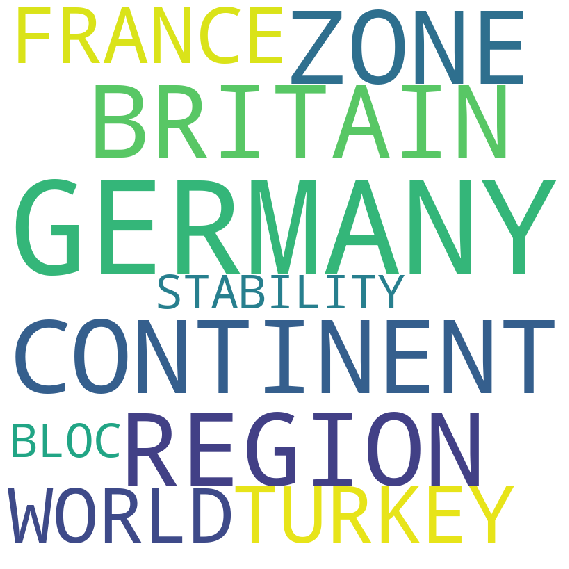

In [31]:
text = model.wv.most_similar('EUROPE')
text_tmp = []
for i in text:
    text_tmp.append(i[0])

text_tmp = str(text_tmp)

text_tmp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text_tmp)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wc1 = WordCloud(max_font_size=200,background_color='white', stopwords='\\',width=800, height=800)
wc1.generate(text_tmp)

plt.figure(figsize=(10, 8))
plt.imshow(wc1)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()